In [2]:
import numpy as np
import csv
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from src import *
import matplotlib.pyplot as plt
import os


20297.3421381159
5


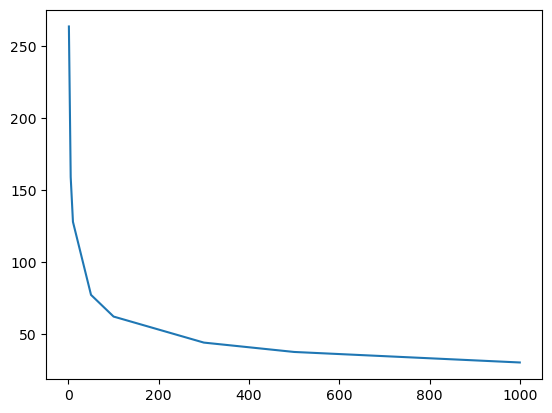

In [12]:
power_list = [1000, 500, 300, 100, 50, 10, 5, 1]
OM1_list =[]

for p in power_list :
    # occ1 =occ_for_power(p)
    # occ1_list.append(occ1)
    OM1 = OM_cost_per_MWh(p)
    OM1_list.append(OM1)
    
plt.plot(power_list ,  OM1_list)    

# OCC

In [2]:




print("OCCs for large, small, microreactors are : " , OCC_large_conservative,  OCC_SMR_conservative, OCC_micro_conservative , "$/kw" )

OCCs for large, small, microreactors are :  7750 10000 20297.3421381159 $/kw


# TCI

In [3]:


print("Total TCIs for large, small, microreactors are : " , np.round(tot_TCI_multiple_reactors( power_large_ref, interest_rate, 1)/1000000000, 2),\
    np.round(tot_TCI_multiple_reactors( power_SMR_ref, interest_rate, 1)/1000000000, 2), np.round(tot_TCI_multiple_reactors(power_micro_ref , interest_rate, 1)/1000000000, 2), "USD (billions)" )

TCIs for large, small, microreactors are :  10331.0 12154.0 22134.0 $/kw
Total TCIs for large, small, microreactors are :  10.33 2.43 0.11 USD (billions)


NameError: name 'occ_for_power' is not defined

In [ ]:
# interest_rate = 0.06
# demand =  1000
# print("The total cost of 1000 MW (in billions of dollars)")
# print(f"{power_large_ref} MW : ",tot_TCI_multiple_reactors (power_large_ref,interest_rate , int(demand/power_large_ref))/1000000000)
# print( f"{power_SMR_ref} MW : " ,tot_TCI_multiple_reactors (power_SMR_ref, interest_rate, int(demand/power_SMR_ref))/1000000000)
# print( f"{power_micro_ref} MW : "  , tot_TCI_multiple_reactors (power_micro_ref, interest_rate, int(demand/power_micro_ref))/1000000000)
# print( f"{1} MW : "  , tot_TCI_multiple_reactors (1, interest_rate, int(demand/1))/1000000000)

In [ ]:
# # number of reactors to achieve the target demand 
# refueling_period = 30 /7) # days
# levelization_period = 30*365

# fuel_lifetime = 2*12*30


# demand_0 = 1000 # MWe
# power_list = [1000, 500, 300] #, 100, 50, 10, 5, 1]
# capacity_factor_criteria_list = [0.9, 0.92, 0.94, 0.96, 0.98, 0.99, 0.999, 0.9999, 0.99999, 1]
# num_reactors_save_tot = []
# TCI_all_reactors_save_tot = []

# for power in power_list :
#     num_reactors_save = []
#     TCI_all_reactors_save = []
#     num_reactors_current = 0 # initialization
#     for capacity_factor_criteria in capacity_factor_criteria_list :
    
#         num_reactors_0 =  max( int( np.ceil( demand_0 /power)), num_reactors_current)
#         for  num_reactors in np.linspace( num_reactors_0 , 2*num_reactors_0, 1+num_reactors_0):
            
                
#             times_array_excludingRampUp = (capacity_factor_weeks_approach(fuel_lifetime, refueling_period, int(num_reactors), power, levelization_period, demand_0 ))[0]
#             # capacity_factor_min =        min ((capacity_factor(fuel_lifetime, refueling_period, int(num_reactors), power, levelization_period, demand_0 ))[1])
#             overall_capacity_factor   =   (capacity_factor(fuel_lifetime, refueling_period, int(num_reactors), power, levelization_period, demand_0 ))[2]
#             # print( power, num_reactors, capacity_factor_criteria, overall_capacity_factor  )
            
#             if  overall_capacity_factor>=  capacity_factor_criteria:
#                 num_reactors_save.append(num_reactors)
#                 TCI_all_reactors = tot_TCI_multiple_reactors (power, 0.075, int(num_reactors)) # assume 7.5 % interest rate # $ /kw
#                 TCI_all_reactors_save.append(TCI_all_reactors)
#                 print(power, num_reactors, TCI_all_reactors )
#                 num_reactors_current = int(num_reactors)
                
#                 break
    
            
#     num_reactors_save_tot.append(num_reactors_save)    
#     TCI_all_reactors_save_tot.append( TCI_all_reactors_save)  

# Annualized Cost

In [14]:
  


# def OM_cost_per_MWh_reactor_mix(power_list, num_reactors_list):
#     OM_cost_for_reactor_type_list = []
    
#     for i  in range(len(power_list)):
#         OM_cost_for_reactor_type = (OM_cost_per_MWh(power_list[i]) ) * num_reactors_list[i]
#         OM_cost_for_reactor_type_list.append(OM_cost_for_reactor_type)
#     return sum(OM_cost_for_reactor_type_list)    

O&M cost for large, SMR, microreactors ($/MWh) are  39.8 41.4 159.79897990810207


In [5]:
# Electricity Prices
# According to: https://www.eia.gov/electricity/monthly/epm_table_grapher.php?t=epmt_5_6_a
# The US total cost of electircy in Apri 2023 is 12.18 cents / kwh and the minimum was 7.59 (dakota)
elec_price_tot = 121.8   # dollar /MWh
elec_price_min = 75.8   # dollar /MWh

# LCOE

In [8]:
def level_cost_of_energy( interest_rate, P, num_reactors, list_of_total_generated_MWh_per_year_from_all_reactors,\
    list_of_generated_MWh_per_year_from_all_reactors_per_demand,list_of_sold_electricity_MWh_per_year_from_all_reactors, elec_price ):
    sum_cost = 0 # initialization 
    sum_elec = 0 # initialization 
           
    for year in range( len(list_of_total_generated_MWh_per_year_from_all_reactors)):
        if year == 0:
            cap_cost =  tot_TCI_multiple_reactors (P, interest_rate, num_reactors) 
            OM_cost_per_year = 0
            elec_gen = 0
            revenue = 0
        
        elif year > 0:
         
            cap_cost = 0 
            OM_cost_per_year = OM_cost_per_MWh(P) * list_of_total_generated_MWh_per_year_from_all_reactors[year-1]
            revenue = elec_price * list_of_sold_electricity_MWh_per_year_from_all_reactors[year-1]
            elec_gen =  list_of_generated_MWh_per_year_from_all_reactors_per_demand[year-1]
        
        sum_cost += (cap_cost + OM_cost_per_year - revenue) / ((1 +interest_rate)**(year) ) 
        sum_elec += elec_gen/ ((1 + interest_rate)**year) 
    
    LCOE =  sum_cost/ sum_elec
    return LCOE    





def level_cost_of_energy_reactor_mix( interest_rate, power_list, num_reactors_list, list_of_total_generated_MWh_per_year_from_all_reactors,\
    list_of_generated_MWh_per_year_from_all_reactors_per_demand,list_of_sold_electricity_MWh_per_year_from_all_reactors, elec_price ):
    
    sum_cost = 0 # initialization 
    sum_elec = 0 # initialization 
           
    for year in range( len(list_of_total_generated_MWh_per_year_from_all_reactors)):
        if year == 0:
            cap_cost =  tot_TCI_multiple_reactors_mix(power_list, interest_rate, num_reactors_list)
            OM_cost_per_year = 0
            elec_gen = 0
            revenue = 0
        
        elif year > 0:
         
            cap_cost = 0 
            
            OM_cost_per_MWh_reactor_mix(power_list, num_reactors_list)
            OM_cost_per_year = OM_cost_per_MWh(P) * list_of_total_generated_MWh_per_year_from_all_reactors[year-1]
            revenue = elec_price * list_of_sold_electricity_MWh_per_year_from_all_reactors[year-1]
            elec_gen =  list_of_generated_MWh_per_year_from_all_reactors_per_demand[year-1]
        
        sum_cost += (cap_cost + OM_cost_per_year - revenue) / ((1 +interest_rate)**(year) ) 
        sum_elec += elec_gen/ ((1 + interest_rate)**year) 
    
    LCOE =  sum_cost/ sum_elec
    return LCOE

# levelization_period_years = int(30)
# interest_rate = 0.06
# P = 500
# num_reactors = int(6000/P)
# list_of_generated_MWh_per_year_from_all_reactors = [num_reactors *P * 8760*0.95]*30
# level_cost_of_energy(levelization_period_years, interest_rate, P, num_reactors, list_of_generated_MWh_per_year_from_all_reactors)

# TCI for target demand and reliability

500 Baseline
500 0.9


KeyboardInterrupt: 

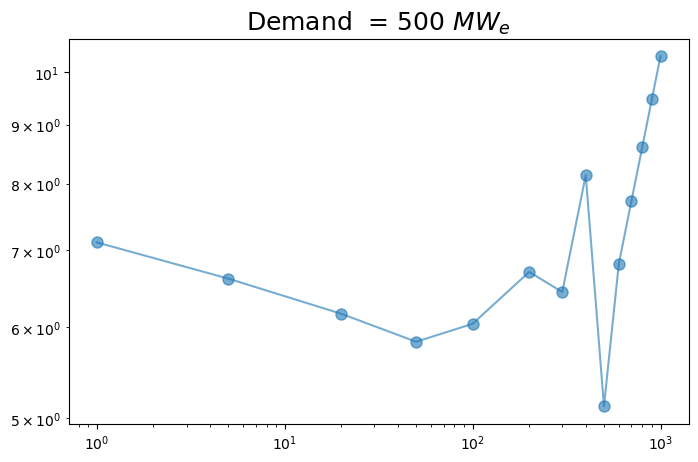

In [9]:
import matplotlib as mpl

# delete the output file is exists
filename = "TCI_for_demand_reliability.csv"
try:
    os.remove(filename)
except OSError:
    pass
    
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1]
min_capacity_factor_criteria_list = ['Baseline' ,0.9, 0.95,  0.99, 0.99999, 1]
interest_rate = 0.06
levelization_period_0 = int(365 * 30/7)
overall_capacity_factor_criteria = 0 # has no effect



for tot_demand in [500,   1000, 3000, 6000] :
    fig = plt.figure(figsize=(8, 5))
    plt.title( f"Demand  = {tot_demand} $MW_e$ ",  fontsize=18)
    for min_capacity_factor_criteria in min_capacity_factor_criteria_list:
        tot_TCI_list = []

        print(tot_demand, min_capacity_factor_criteria)
        for reactor_power in power_list:

            fuel_lifetime = operational_lifetime_estimate(reactor_power) 
            refueling_period =  refueling_period_estimate(reactor_power) 
            
            if min_capacity_factor_criteria == "Baseline":
               num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            0, fuel_lifetime, refueling_period, reactor_power ,\
                                levelization_period_0, tot_demand))) 
            else:
            
                num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria, fuel_lifetime, refueling_period, reactor_power ,\
                                levelization_period_0, tot_demand)))

            tot_TCI = (tot_TCI_multiple_reactors (reactor_power, interest_rate, num_reactors_needed)) / 1000000000
            tot_TCI_list.append(tot_TCI)
        
        # save it into a list
        df1 = pd.DataFrame(tot_TCI_list)
        df1.to_csv(filename , mode='a',index = False)
        
        if min_capacity_factor_criteria == "Baseline" :
            plt.plot(power_list , tot_TCI_list , '-o' , markersize = 8,  alpha=0.6 ,label = "Baseline")
        else:
            plt.plot(power_list , tot_TCI_list , '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = { min_capacity_factor_criteria}")

           
        plt.yscale('log')
        plt.xscale('log')
    if tot_demand == 500:
        plt.legend(bbox_to_anchor=(0.5, 1.5), loc='upper center', fontsize=17 , ncol=3)


    
    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on() 
    
    # 
    # plt.gca().yaxis.set_minor_locator(plt.FixedLocator([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))
    # plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter(''))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.2f')) 
    plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    ticks_list = np.linspace( 2*np.floor((min(tot_TCI_list))/2)    , 2*np.ceil((max(tot_TCI_list))/2), int(1    +    np.ceil((max(tot_TCI_list))/2)   -    np.floor((min(tot_TCI_list))/2)   )  )
    plt.yticks( ticks_list)
    
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
   
    
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    
    plt.xlabel('Power ($MW_e$)', fontsize=18)
    plt.ylabel('TCI (USD Billions)', fontsize=18) 
    # plt.ylim(0,  10*np.ceil(max(tot_TCI_list)/10)          )
    plt.xlim( 1, 1000)
    
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17) 
    plt.savefig(f'TCI_{tot_demand}.png', bbox_inches='tight')
    plt.show()

# LCOE  = f (power, reliability and demand)

In [10]:


# delete the output file is exists
filename = "LCOE_for_demand_reliability.csv"
try:
    os.remove(filename)
except OSError:
    pass
    
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1]
min_capacity_factor_criteria_list = ['Baseline' ,0.9, 0.95,  0.99, 0.99999, 1]
interest_rate = 0.06
levelization_period_0 = int(365 * 30/7)
overall_capacity_factor_criteria = 0 # has no effect



for tot_demand in [500 ,  1000, 3000, 6000] :
    
    demand_tot_lcoe_no_sell_list = []
    demand_tot_lcoe_sell_list = []
    
    for min_capacity_factor_criteria in min_capacity_factor_criteria_list:
        tot_lcoe_no_sell_list = []
        tot_lcoe_with_sell_list = []

        print(tot_demand, min_capacity_factor_criteria)
        for reactor_power in power_list:

            fuel_lifetime = operational_lifetime_estimate(reactor_power) 
            refueling_period =  refueling_period_estimate(reactor_power) 
            
            if min_capacity_factor_criteria == "Baseline":
               num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            0, fuel_lifetime, refueling_period, reactor_power ,\
                                levelization_period_0, tot_demand))) 
            else:
            
                num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria, fuel_lifetime, refueling_period, reactor_power ,\
                                levelization_period_0, tot_demand)))
            
            results = capacity_factor_weeks_approach(fuel_lifetime, refueling_period, num_reactors_needed, reactor_power, levelization_period_0, tot_demand)
            Tot_MWh_generated_per_year_list = results[3]
            MWh_generated_per_year_per_demand_list = results[4]
            MWh_excess_per_year_list = results[5]
           
            # LCOE with and without selling electricity
            lcoe_no_sell = level_cost_of_energy( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, 0)
            lcoe_with_sell = level_cost_of_energy( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_min)
            tot_lcoe_no_sell_list.append(lcoe_no_sell)
            tot_lcoe_with_sell_list.append(lcoe_with_sell )

        demand_tot_lcoe_no_sell_list.append(tot_lcoe_no_sell_list)
        demand_tot_lcoe_sell_list.append(tot_lcoe_with_sell_list)
    
    if tot_demand == 500: 
          demand_tot_lcoe_no_sell_list_500 = demand_tot_lcoe_no_sell_list 
          demand_tot_lcoe_sell_list_500 = demand_tot_lcoe_sell_list
    elif tot_demand == 1000:  
        demand_tot_lcoe_no_sell_list_1000 = demand_tot_lcoe_no_sell_list 
        demand_tot_lcoe_sell_list_1000 = demand_tot_lcoe_sell_list
    elif tot_demand == 3000: 
        demand_tot_lcoe_no_sell_list_3000 = demand_tot_lcoe_no_sell_list
        demand_tot_lcoe_sell_list_3000 = demand_tot_lcoe_sell_list   
    elif tot_demand == 6000: 
        demand_tot_lcoe_no_sell_list_6000 = demand_tot_lcoe_no_sell_list 
        demand_tot_lcoe_sell_list_6000 = demand_tot_lcoe_sell_list               

500 Baseline
500 0.9


KeyboardInterrupt: 

# Plot LCOE without grid export

In [ ]:
tot_demand_list = [500,  1000, 3000, 6000]
tot_lcoe_no_sell_lists = [demand_tot_lcoe_no_sell_list_500,  demand_tot_lcoe_no_sell_list_1000,\
    demand_tot_lcoe_no_sell_list_3000, demand_tot_lcoe_no_sell_list_6000]

for i in range(len(tot_demand_list )):
    fig = plt.figure(figsize=(8, 5))
    plt.title( f"Demand  = {tot_demand_list[i]} $MW_e$ \n (Surplus energy is not sold to the Grid) ",  fontsize=16,  x=0.55, y=0.82, backgroundcolor='white') 
    lcoe_no_sell_list = tot_lcoe_no_sell_lists[i]
    for k in range(len(min_capacity_factor_criteria_list)) :
        lcoe_no_sell_k = lcoe_no_sell_list[k]
        if min_capacity_factor_criteria_list[k] == "Baseline":
            plt.plot(power_list ,lcoe_no_sell_k  , '-o' , markersize = 8,  alpha=0.6 ,label = "Baseline")
        else: 
            plt.plot(power_list , lcoe_no_sell_k , '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = { min_capacity_factor_criteria_list[k]}")
           
        plt.yscale('log')
        plt.xscale('log')
    if tot_demand_list[i] == 500:
        plt.legend(bbox_to_anchor=(0.5, 1.5), loc='upper center', fontsize=17 , ncol=3)

    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on() 
     
    plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    # setting the ticks
    ticks_min = 40 * np.floor(min(np.concatenate(lcoe_no_sell_list))/40)
    ticks_max = 40 * np.ceil(max(np.concatenate(lcoe_no_sell_list))/40)
    
    ticks_list = np.linspace(ticks_min , ticks_max , 1 +  int((ticks_max - ticks_min)/40)  )    # plt.yticks( ticks_list)
    plt.yticks( ticks_list)
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
       
    plt.xlabel('Power ($MW_e$)', fontsize=18)
    plt.ylabel('LCOE ($/MWh)', fontsize=18) 
    plt.xlim( 1, 1000)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17) 
    plt.savefig(f'LCOE_{tot_demand}.png', bbox_inches='tight')
    plt.show()

Plot LCOE with grid export

In [ ]:
 
tot_lcoe_sell_lists = [demand_tot_lcoe_sell_list_500,  demand_tot_lcoe_sell_list_1000,\
    demand_tot_lcoe_sell_list_3000, demand_tot_lcoe_sell_list_6000]

for i in range(len(tot_demand_list )):
    fig = plt.figure(figsize=(8, 5))
    plt.title( f"Demand  = {tot_demand_list[i]} $MW_e$ \n (Surplus energy sold to the Grid) ",  fontsize=16,  x=0.55, y=0.82, backgroundcolor='white') 
    lcoe_sell_list = tot_lcoe_sell_lists[i]
    for k in range(len(min_capacity_factor_criteria_list)) :
        lcoe_sell_k = lcoe_sell_list[k]
        if min_capacity_factor_criteria_list[k] == "Baseline":
            plt.plot(power_list ,lcoe_sell_k  , '-o' , markersize = 8,  alpha=0.6 ,label = "Baseline")
        else: 
            plt.plot(power_list , lcoe_sell_k , '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = { min_capacity_factor_criteria_list[k]}")
           
        plt.yscale('log')
        plt.xscale('log')
    if tot_demand_list[i] == 500:
        plt.legend(bbox_to_anchor=(0.5, 1.5), loc='upper center', fontsize=17 , ncol=3)

    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on() 
     
    plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
    
    # setting the ticks
    ticks_min = 40 * np.floor(min(np.concatenate(lcoe_no_sell_list))/40)
    ticks_max = 40 * np.ceil(max(np.concatenate(lcoe_no_sell_list))/40)
    
    ticks_list = np.linspace(ticks_min , ticks_max , 1 +  int((ticks_max - ticks_min)/40)  )    # plt.yticks( ticks_list)
    plt.yticks( ticks_list)
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
       
    plt.xlabel('Power ($MW_e$)', fontsize=18)
    plt.ylabel('LCOE ($/MWh)', fontsize=18) 
    plt.xlim( 1, 1000)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17) 
    plt.savefig(f'LCOE_Selling{tot_demand}.png', bbox_inches='tight')
    plt.show()
